# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- ‘Astonishing’ Crypto Algorithm Shows Traders Are Bullish on Bitcoin, Ethereum and Two Gaming Altcoins.  An autonomous bot known for outperforming the crypto market using weekly surveys from traders shows a bullish leaning towards Bitcoin, Ethereum, Solana and two additional gaming altcoins. The Real Vision Bot was co-developed by quant analyst and hedge fund CEO Mortiz Seibert as a way to obtain signals and trader sentiment from fans of the [&#8230;]The post &#8216;Astonishing&#8217; Crypto Algorithm Shows Traders Are Bullish on Bitcoin, Ethereum and Two Gaming Altcoins appeared first on The Daily Hodl. ... [| Skaityti daugiau](https://dailyhodl.com/2021/12/13/astonishing-crypto-algorithm-shows-traders-are-bullish-on-bitcoin-ethereum-and-two-gaming-altcoins/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Ontario just days from COVID-19 case surge similar to Kingston, expert says | CBC News.  Indoor and outdoor gatherings in the city of Kingston, Ont., will be limited to five people as of 6 p.m. ET Monday as the omicron variant drives a surge of COVID-19 in the region, while a local expert says the province will soon see a similar increase in case… ... [| Skaityti daugiau](http://www.cbc.ca/news/canada/ottawa/kingston-section-22-health-order-1.6283964) 

### Kainų kaita pandemijos metu

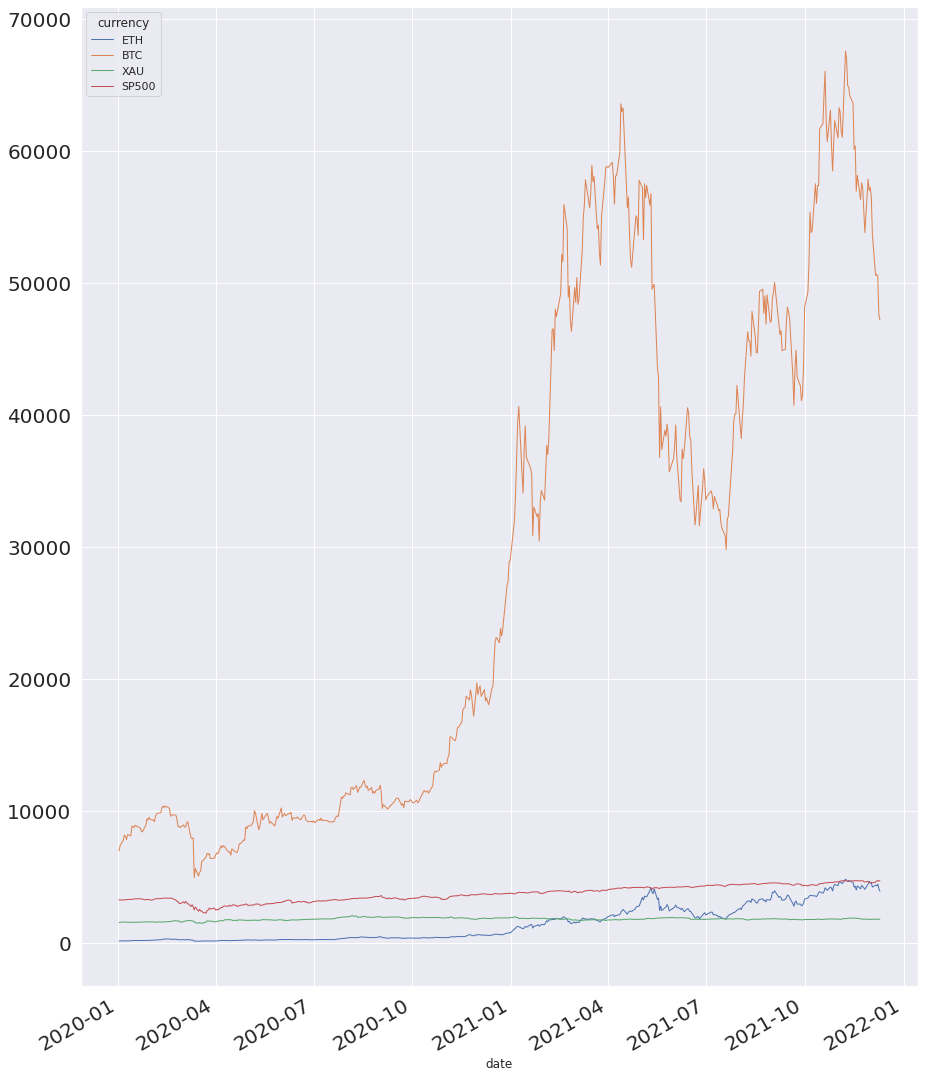

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.906634,0.148915,0.908658
BTC,0.906634,1.000000,0.131120,0.878506
XAU,0.148915,0.131120,1.000000,0.304088
SP500,0.908658,0.878506,0.304088,1.000000


In [8]:
#hide ### Koreliacijos matrica.

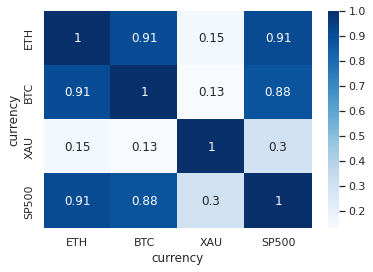

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')